In [ ]:
!pip install keras.utlis

ERROR: Could not find a version that satisfies the requirement keras.utlis (from versions: none)
ERROR: No matching distribution found for keras.utlis


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Obesity Risk/sample_submission.csv')
df

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight
...,...,...
13835,34593,Normal_Weight
13836,34594,Normal_Weight
13837,34595,Normal_Weight
13838,34596,Normal_Weight


In [ ]:
traindf=pd.read_csv('/content/drive/MyDrive/Obesity Risk/train.csv')
traindf

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [ ]:
traindf['NObeyesdad'].unique()


array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [ ]:
testdf=pd.read_csv('/content/drive/MyDrive/Obesity Risk/test.csv')
testdf

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


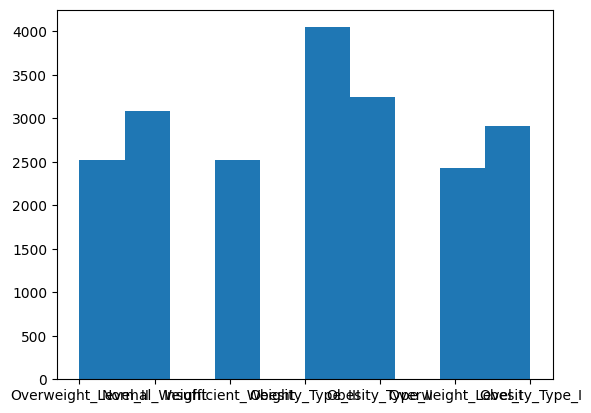

In [ ]:
plt.hist(traindf['NObeyesdad'])
plt.show()

In [ ]:
traindf.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
x=traindf.iloc[:,1:-1]
y=traindf.iloc[:,-1:]
xtest=testdf.iloc[:,1:]

fix class imbalances

In [ ]:
over = RandomOverSampler()
x,y = over.fit_resample(x,y)
x

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28317,Female,33.789301,1.701387,99.812443,yes,yes,2.971588,2.968098,Sometimes,no,1.817860,no,1.978043,0.972054,no,Public_Transportation
28318,Male,22.730414,1.683124,81.603501,yes,yes,2.000000,1.146052,Sometimes,no,1.962646,no,0.000000,1.237867,Sometimes,Public_Transportation
28319,Male,19.076443,1.767563,82.000000,yes,yes,1.081585,3.998766,Sometimes,no,2.627569,no,2.000000,0.315261,Sometimes,Public_Transportation
28320,Female,33.185661,1.684082,83.000000,yes,yes,2.000000,1.000000,Sometimes,no,1.675733,no,1.000000,0.000000,no,Automobile


In [ ]:
di = {"Obesity_Type_III":0, "Obesity_Type_II":1, "Normal_Weight":2,
       "Obesity_Type_I":3, "Insufficient_Weight":4, "Overweight_Level_II":5,
       "Overweight_Level_I":6}
y['NObeyesdad'] = y['NObeyesdad'].map(di)
y

,NObeyesdad
0,5
1,2
2,4
3,0
4,5
...,...
28317,5
28318,5
28319,5
28320,5


Nommalize numeric data encode categorical *data*

In [ ]:
def encodescale(tempdf):
  ob = tempdf.columns.to_list()
  temp=""
  for i in ob:
      temp = tempdf[i]
      if(tempdf[i].dtype=='object'):
        # encode class values as integers
        encoder = LabelEncoder()
        encoder.fit(temp)
        encoded_temp = encoder.transform(temp)
        tempdf[i]=encoded_temp
      else:
        scaler = StandardScaler()
        tempdf[i]=scaler.fit_transform(temp.values.reshape(-1,1))
  return tempdf



In [ ]:
xcom=pd.concat([x,xtest])
xcom=encodescale(xcom)
xcom

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,0.105678,0.005549,-0.154683,1,1,-0.792506,0.329902,2,0,1.230181,0,-1.188009,0.572630,2,3
1,0,-0.993025,-1.580591,-1.110670,1,1,-0.792506,0.352813,1,0,-0.024916,0,0.002028,0.610791,3,0
2,0,-0.993025,0.135411,-1.375504,1,1,-1.017325,-1.825841,2,0,-0.172229,0,-0.157383,1.703355,3,3
3,0,-0.489505,0.127140,1.767560,1,1,1.089356,0.352813,2,0,-0.560667,0,0.558802,0.254270,2,3
4,1,1.333138,2.432242,0.315294,1,1,0.486528,-1.057995,2,0,-0.058040,0,1.153951,0.500041,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,1,-0.084489,0.247847,-0.295720,1,0,0.737888,0.352813,2,0,-1.668632,0,-0.227559,0.251728,2,3
13836,0,0.882764,-1.240699,-0.916914,0,1,1.089356,0.352813,2,0,-0.024916,0,-1.188009,-1.011226,2,3
13837,0,-0.151373,-1.291150,-1.599839,0,1,1.089356,-0.643381,1,0,-0.024916,0,1.132372,0.610791,2,3
13838,1,-0.481446,-0.900807,-1.265674,1,1,-0.792506,0.352813,2,0,-0.024916,0,2.382101,2.232807,3,3


test train validation split

In [ ]:
x = xcom.iloc[:len(x)]
xtest = xcom.iloc[len(x):]

In [ ]:
xtest

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,0.524640,1.685703,1.355610,1,1,0.973840,0.352813,2,0,1.332184,0,-0.170051,-1.011226,2,3
1,0,-0.481446,-1.127402,-0.761910,1,1,-0.792506,-2.390540,2,0,1.618800,0,0.002028,-1.011226,2,3
2,0,0.371185,-0.636201,1.005160,1,1,1.089356,0.352813,2,0,0.997273,0,-1.188009,-0.604907,2,3
3,1,-0.484984,-1.658460,0.697808,1,1,-0.792506,0.322511,2,0,1.267730,0,-1.075132,-1.011226,2,3
4,0,0.371185,-0.817012,0.743001,1,1,1.089356,0.352813,2,0,1.049304,0,-1.188009,0.190800,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,1,-0.084489,0.247847,-0.295720,1,0,0.737888,0.352813,2,0,-1.668632,0,-0.227559,0.251728,2,3
13836,0,0.882764,-1.240699,-0.916914,0,1,1.089356,0.352813,2,0,-0.024916,0,-1.188009,-1.011226,2,3
13837,0,-0.151373,-1.291150,-1.599839,0,1,1.089356,-0.643381,1,0,-0.024916,0,1.132372,0.610791,2,3
13838,1,-0.481446,-0.900807,-1.265674,1,1,-0.792506,0.352813,2,0,-0.024916,0,2.382101,2.232807,3,3


In [ ]:
x

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,0.105678,0.005549,-0.154683,1,1,-0.792506,0.329902,2,0,1.230181,0,-1.188009,0.572630,2,3
1,0,-0.993025,-1.580591,-1.110670,1,1,-0.792506,0.352813,1,0,-0.024916,0,0.002028,0.610791,3,0
2,0,-0.993025,0.135411,-1.375504,1,1,-1.017325,-1.825841,2,0,-0.172229,0,-0.157383,1.703355,3,3
3,0,-0.489505,0.127140,1.767560,1,1,1.089356,0.352813,2,0,-0.560667,0,0.558802,0.254270,2,3
4,1,1.333138,2.432242,0.315294,1,1,0.486528,-1.057995,2,0,-0.058040,0,1.153951,0.500041,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28317,0,1.699466,0.021286,0.548358,1,1,1.035889,0.309054,2,0,-0.324302,0,1.165935,0.565462,3,3
28318,1,-0.186365,-0.185629,-0.157258,1,1,-0.792506,-2.190204,2,0,-0.086315,0,-1.188009,0.996615,2,3
28319,1,-0.809463,0.771043,-0.141893,1,1,-2.520837,1.722797,2,0,1.006629,0,1.192064,-0.499867,2,3
28320,0,1.596529,-0.174775,-0.103142,1,1,-0.792506,-2.390540,2,0,-0.557919,0,0.002028,-1.011226,3,0


In [ ]:
y

,NObeyesdad
0,5
1,2
2,4
3,0
4,5
...,...
28317,5
28318,5
28319,5
28320,5


In [ ]:
xtest

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,1,0.524640,1.685703,1.355610,1,1,0.973840,0.352813,2,0,1.332184,0,-0.170051,-1.011226,2,3
1,0,-0.481446,-1.127402,-0.761910,1,1,-0.792506,-2.390540,2,0,1.618800,0,0.002028,-1.011226,2,3
2,0,0.371185,-0.636201,1.005160,1,1,1.089356,0.352813,2,0,0.997273,0,-1.188009,-0.604907,2,3
3,1,-0.484984,-1.658460,0.697808,1,1,-0.792506,0.322511,2,0,1.267730,0,-1.075132,-1.011226,2,3
4,0,0.371185,-0.817012,0.743001,1,1,1.089356,0.352813,2,0,1.049304,0,-1.188009,0.190800,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,1,-0.084489,0.247847,-0.295720,1,0,0.737888,0.352813,2,0,-1.668632,0,-0.227559,0.251728,2,3
13836,0,0.882764,-1.240699,-0.916914,0,1,1.089356,0.352813,2,0,-0.024916,0,-1.188009,-1.011226,2,3
13837,0,-0.151373,-1.291150,-1.599839,0,1,1.089356,-0.643381,1,0,-0.024916,0,1.132372,0.610791,2,3
13838,1,-0.481446,-0.900807,-1.265674,1,1,-0.792506,0.352813,2,0,-0.024916,0,2.382101,2.232807,3,3


normalize encoded data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=1000)
modelrf = random_forest.fit(x, y)
accuracy = round(random_forest.score(x, y) * 100, 2)
accuracy

<ipython-input-43-ca32fa6eb5f2>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelrf = random_forest.fit(x, y)


100.0

In [ ]:
predictions = modelrf.predict(xtest)
predictions

array([1, 6, 0, ..., 4, 2, 1])

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
modelft = dt.fit(x, y)
accuracy = round(random_forest.score(x, y) * 100, 2)
accuracy

100.0

In [ ]:
predictionsdt = modelft.predict(xtest)
predictionsdt

array([1, 6, 0, ..., 4, 2, 1])

In [ ]:
from sklearn import tree
tree.plot_tree(modelft)

[Text(0.6370520009832542, 0.9833333333333333, 'x[3] <= 0.54\ngini = 0.857\nsamples = 28322\nvalue = [4046, 4046, 4046, 4046, 4046, 4046, 4046]'),
 Text(0.33168393333245944, 0.95, 'x[3] <= -0.936\ngini = 0.799\nsamples = 19152\nvalue = [7, 98, 4046, 2894, 4043, 4018, 4046]'),
 Text(0.12554971458527492, 0.9166666666666666, 'x[3] <= -1.273\ngini = 0.489\nsamples = 6387\nvalue = [1, 0, 2201, 5, 3997, 38, 145]'),
 Text(0.0699548934943378, 0.8833333333333333, 'x[2] <= -0.773\ngini = 0.298\nsamples = 3750\nvalue = [1, 0, 659, 3, 3071, 0, 16]'),
 Text(0.043206534492815814, 0.85, 'x[3] <= -1.505\ngini = 0.446\nsamples = 1830\nvalue = [1, 0, 594, 1, 1226, 0, 8]'),
 Text(0.021480485695320725, 0.8166666666666667, 'x[3] <= -1.578\ngini = 0.19\nsamples = 1223\nvalue = [1, 0, 121, 1, 1094, 0, 6]'),
 Text(0.010995863141732653, 0.7833333333333333, 'x[8] <= 2.5\ngini = 0.055\nsamples = 820\nvalue = [1, 0, 17, 1, 797, 0, 4]'),
 Text(0.009064882297330821, 0.75, 'x[6] <= -0.708\ngini = 0.048\nsamples = 816

Error in callback <function flush_figures at 0x7c2fb8124160> (for post_execute):


KeyboardInterrupt: 

In [ ]:
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.8 MB/s eta 0:00:00


In [ ]:
import dtreeviz # remember to load the package

viz = dtreeviz.model(dt, x, y)
v = viz.view()     # render as SVG into internal object
viz.save("/content/drive/MyDrive/Obesity Risk/ouptut3.svg")  # optionally save as svg


AttributeError: 'DataFrame' object has no attribute 'dtype'

construct model

In [ ]:
import tensorflow as tf
import keras


In [ ]:
model=tf.keras.Sequential(
    [
        tf.keras.layers.Dense(16,activation='relu'),
        #tf.keras.layers.Dropout(rate=0.5),
        tf.keras.layers.Dense(32,activation='selu'),
        #tf.keras.layers.Dropout(rate=0.5),
        #tf.keras.layers.Attention(use_scale=False, score_mode="dot", dropout=0.0, seed=None),
        #tf.keras.layers.Dense(32,activation='selu'),
        #tf.keras.layers.Dropout(rate=0.5),
        #tf.keras.layers.Dense(64,activation='tanh'),
        #tf.keras.layers.GlobalMaxPooling2D(pool_size=2, strides=2, padding="valid"),
        tf.keras.layers.Dense(32,activation='selu'),
        tf.keras.layers.Dense(16,activation='relu'),
        #tf.keras.layers.Dense(16,activation='selu'),
        tf.keras.layers.Dense(7,activation='softmax')
    ]
)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy','sparse_categorical_accuracy'])

model evaluation with trianing

In [ ]:
model.evaluate(x,y)

886/886 [==============================] - 2s 1ms/step - loss: 2.2756 - accuracy: 0.1389 - sparse_categorical_accuracy: 0.1389


[2.27561616897583, 0.1388673186302185, 0.1388673186302185]

model training

In [ ]:
hist = model.fit(x,y,batch_size=16,epochs=75)

Epoch 1/75
1771/1771 [==============================] - 5s 2ms/step - loss: 1.0615 - accuracy: 0.6087 - sparse_categorical_accuracy: 0.6087
Epoch 2/75
1771/1771 [==============================] - 3s 2ms/step - loss: 0.5129 - accuracy: 0.8167 - sparse_categorical_accuracy: 0.8167
Epoch 3/75
1771/1771 [==============================] - 3s 2ms/step - loss: 0.4703 - accuracy: 0.8328 - sparse_categorical_accuracy: 0.8328
Epoch 4/75
1771/1771 [==============================] - 3s 2ms/step - loss: 0.4537 - accuracy: 0.8394 - sparse_categorical_accuracy: 0.8394
Epoch 5/75
1771/1771 [==============================] - 4s 2ms/step - loss: 0.4453 - accuracy: 0.8431 - sparse_categorical_accuracy: 0.8431
Epoch 6/75
1771/1771 [==============================] - 3s 2ms/step - loss: 0.4366 - accuracy: 0.8471 - sparse_categorical_accuracy: 0.8471
Epoch 7/75
1771/1771 [==============================] - 3s 2ms/step - loss: 0.4309 - accuracy: 0.8496 - sparse_categorical_accuracy: 0.8496
Epoch 8/75
1771/1771

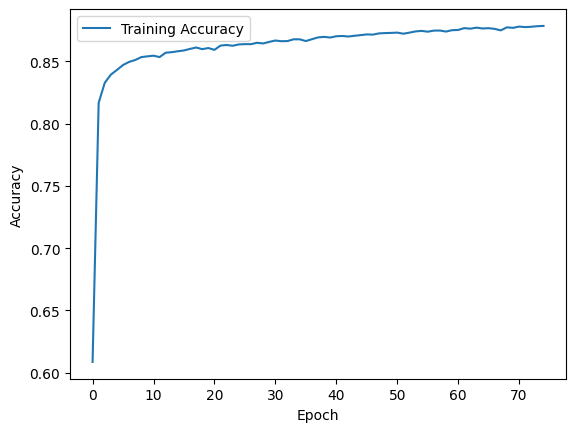

In [ ]:
plt.plot(hist.history['accuracy'],label='Training Accuracy')
#plt.plot(hist.history['loss'],label='loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

model testing

In [ ]:
predict_x=model.predict(xtest)
classes_x=np.argmax(predict_x,axis=1)

433/433 [==============================] - 1s 1ms/step


In [ ]:
classes_x

array([1, 6, 0, ..., 4, 2, 1])

In [ ]:
len(classes_x)

13840

In [ ]:
output=pd.DataFrame()

In [ ]:
output['NObeyesdad']=classes_x
di = {0:"Obesity_Type_III", 1:"Obesity_Type_II", 2:"Normal_Weight",
       3:"Obesity_Type_I", 4:"Insufficient_Weight", 5:"Overweight_Level_II",
       6:"Overweight_Level_I"}
output['NObeyesdad'] = output['NObeyesdad'].map(di)
output['id'] = range(20758, 20758+len(output))
output[['id','NObeyesdad']].to_csv("/content/drive/MyDrive/Obesity Risk/ouptut.csv",index=False)

In [ ]:
output['NObeyesdad']=predictions
di = {0:"Obesity_Type_III", 1:"Obesity_Type_II", 2:"Normal_Weight",
       3:"Obesity_Type_I", 4:"Insufficient_Weight", 5:"Overweight_Level_II",
       6:"Overweight_Level_I"}
output['NObeyesdad'] = output['NObeyesdad'].map(di)
output['id'] = range(20758, 20758+len(output))
output[['id','NObeyesdad']].to_csv("/content/drive/MyDrive/Obesity Risk/ouptut2.csv",index=False)

In [ ]:
output['NObeyesdad']=predictionsdt
di = {0:"Obesity_Type_III", 1:"Obesity_Type_II", 2:"Normal_Weight",
       3:"Obesity_Type_I", 4:"Insufficient_Weight", 5:"Overweight_Level_II",
       6:"Overweight_Level_I"}
output['NObeyesdad'] = output['NObeyesdad'].map(di)
output['id'] = range(20758, 20758+len(output))
output[['id','NObeyesdad']].to_csv("/content/drive/MyDrive/Obesity Risk/ouptut3.csv",index=False)

In [ ]:
testdf['unit_sales(in millions)']=testdf['unit_sales(in millions)'].astype(object)
testdf['total_children']=testdf['total_children'].astype(object)
testdf['num_children_at_home']=testdf['num_children_at_home'].astype(object)
testdf['avg_cars_at home(approx).1']=testdf['avg_cars_at home(approx).1'].astype(object)
testdf['recyclable_package']=testdf['recyclable_package'].astype(object)
testdf['low_fat']=testdf['low_fat'].astype(object)
testdf['coffee_bar']=testdf['coffee_bar'].astype(object)
testdf['video_store']=testdf['video_store'].astype(object)
testdf['salad_bar']=testdf['salad_bar'].astype(object)
testdf['prepared_food']=testdf['prepared_food'].astype(object)
testdf['florist']=testdf['florist'].astype(object)